In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from funnel_analysis import load_data, run_funnel_analysis, get_top_starting_pages, get_top_step_transitions

sns.set_theme(style="whitegrid")

# Load data
df = load_data("user_journey_raw.csv")
df.head()

,user_id,session_id,subscription_type,user_journey,journey_length
0,1516,2980231,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...,18
1,1516,2980248,Annual,Other-Sign up-Sign up-Sign up-Sign up-Sign up-...,12
2,1516,2992252,Annual,Log in-Log in-Log in-Log in-Log in-Log in,6
3,1516,3070491,Annual,Homepage-Log in-Log in-Log in-Log in-Log in-Lo...,10
4,1516,3709807,Annual,Log in-Log in-Log in-Log in-Log in-Log in-Log ...,14


In [6]:
FUNNEL_STEPS = ['Homepage', 'Career tracks', 'Pricing', 'Sign up', 'Checkout']

funnel_results = run_funnel_analysis(df, FUNNEL_STEPS)
funnel_results

,Sessions,Step Conversion Rate
Homepage,2396.0,100.00
Career tracks,420.0,17.53
Pricing,79.0,18.81
Sign up,22.0,27.85
Checkout,0.0,0.00


/tmp/ipython-input-569380867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=funnel_results.index, y='Sessions', data=funnel_results, palette="viridis")


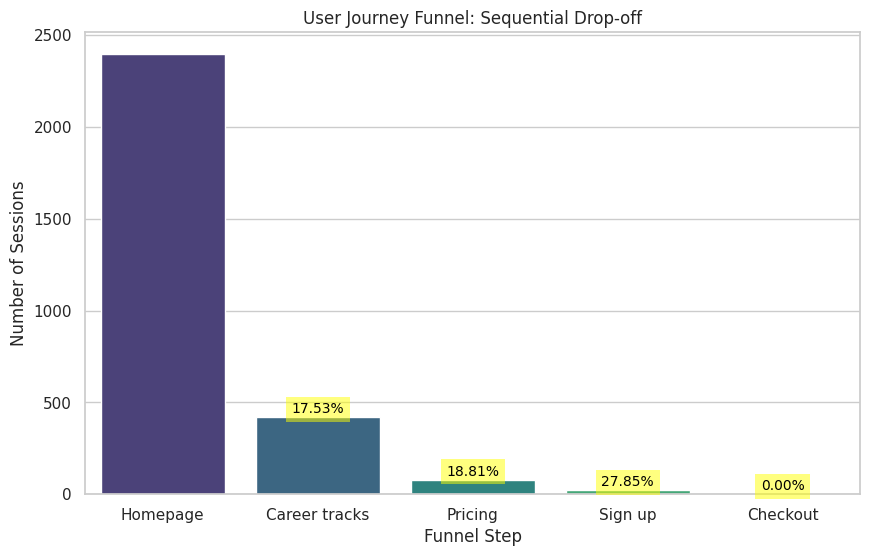

In [7]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=funnel_results.index, y='Sessions', data=funnel_results, palette="viridis")

for i, row_index in enumerate(funnel_results.index):
    if i > 0:
        conversion_rate = funnel_results.loc[row_index, 'Step Conversion Rate']
        sessions = funnel_results.loc[row_index, 'Sessions']
        ax.text(i, sessions + 5, f'{conversion_rate:.2f}%', ha='center', va='bottom', fontsize=10, color='black', bbox=dict(facecolor='yellow', alpha=0.5, edgecolor='none'))

plt.title("User Journey Funnel: Sequential Drop-off")
plt.ylabel("Number of Sessions")
plt.xlabel("Funnel Step")
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
top_starting_steps = get_top_starting_pages(df)
top_starting_steps

,count
first_step,
Log in,2379
Homepage,2329
Checkout,1776
Other,1257
Coupon,1013


/tmp/ipython-input-2370440633.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_starting_steps.index, y=top_starting_steps.values, palette="rocket")


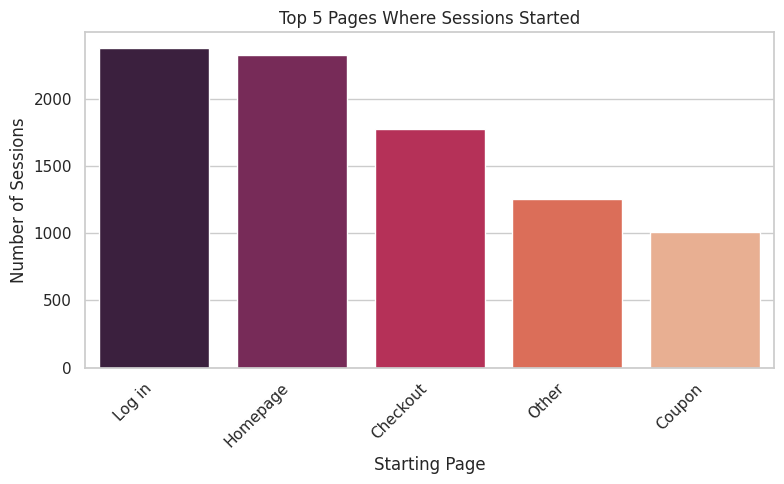

In [9]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_starting_steps.index, y=top_starting_steps.values, palette="rocket")
plt.title("Top 5 Pages Where Sessions Started")
plt.ylabel("Number of Sessions")
plt.xlabel("Starting Page")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [10]:
path_counts = get_top_step_transitions(df)
path_counts

,count
Checkout -> Checkout,15832
Log in -> Log in,13389
Coupon -> Coupon,10814
Courses -> Courses,5962
Sign up -> Sign up,5521
Other -> Other,5057
Career tracks -> Career tracks,3775
Career track certificate -> Career track certificate,2563
Resources center -> Resources center,1686
Pricing -> Pricing,1168


/tmp/ipython-input-1606084849.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=path_counts.index, x=path_counts.values, palette="coolwarm")


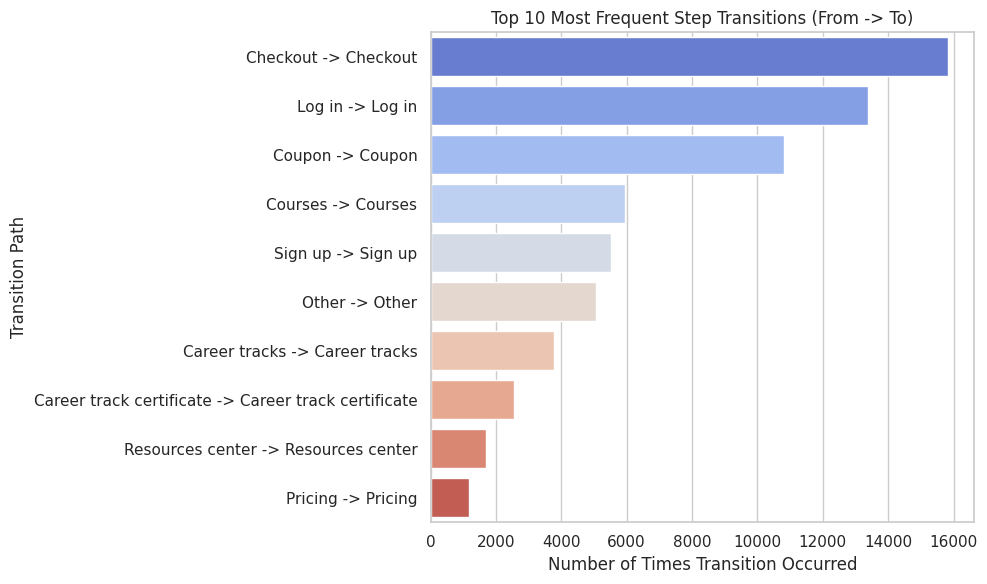

In [11]:
plt.figure(figsize=(10, 6))
sns.barplot(y=path_counts.index, x=path_counts.values, palette="coolwarm")
plt.title("Top 10 Most Frequent Step Transitions (From -> To)")
plt.xlabel("Number of Times Transition Occurred")
plt.ylabel("Transition Path")
plt.tight_layout()
plt.show()